# Ungraded Lab: Build a Multi-output Model

In this lab, we'll show how you can build models with more than one output. The dataset we will be working on is available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency). It is an Energy Efficiency dataset which uses the bulding features (e.g. wall area, roof area) as inputs and has two outputs: Cooling Load and Heating Load. Let's see how we can build a model to train on this data.

## Imports

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

## Utilities

We define a few utilities for data conversion and visualization to make our code more neat.

In [2]:
def format_output(data):
    y1 = data.pop('Y1')
    y1 = np.array(y1)
    y2 = data.pop('Y2')
    y2 = np.array(y2)
    return y1, y2


def norm(x):
    return (x - train_stats['mean']) / train_stats['std']


def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

## Prepare the Data

We download the dataset and format it for training.

In [3]:
# Specify data URI
URI = './data/ENB2012_data.xlsx'

# Use pandas excel reader
df = pd.read_excel(URI)
df = df.sample(frac=1).reset_index(drop=True)

# Split the data into train and test with 80 train / 20 test
train, test = train_test_split(df, test_size=0.2)
train_stats = train.describe()

# Get Y1 and Y2 as the 2 outputs and format them as np arrays
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)

# Normalize the training and test data
norm_train_X = norm(train)
norm_test_X = norm(test)

以下の４ブロックはスキップし、Build the Modelへ

In [7]:
URI = './data/ENB2012_data.xlsx'

# Use pandas excel reader
df = pd.read_excel(URI)
df = df.sample(frac=1).reset_index(drop=True)

# Split the data into train and test with 80 train / 20 test
train, test = train_test_split(df, test_size=0.2)
train_stats = train.describe()
train_stats

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.763762,672.353420,318.380293,176.986564,5.232899,3.519544,0.237704,2.825733,22.342648,24.621124
std,0.107195,89.308923,42.848417,45.221892,1.751343,1.115855,0.132054,1.532866,10.106283,9.562541
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,6.010000,10.940000
25%,0.660000,612.500000,294.000000,147.000000,3.500000,3.000000,0.100000,2.000000,13.002500,15.640000
50%,0.740000,686.000000,318.500000,220.500000,3.500000,4.000000,0.250000,3.000000,18.795000,21.805000
75%,0.820000,759.500000,343.000000,220.500000,7.000000,5.000000,0.400000,4.000000,31.655000,33.112500
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,43.100000,48.030000


In [8]:
# Specify data URI
URI = './data/ENB2012_data.xlsx'

# Use pandas excel reader
df = pd.read_excel(URI)
df = df.sample(frac=1).reset_index(drop=True)

# Split the data into train and test with 80 train / 20 test
train, test = train_test_split(df, test_size=0.2)
train_stats = train.describe()

# Get Y1 and Y2 as the 2 outputs and format them as np arrays
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
X1,614.0,0.762932,0.106044,0.62,0.66,0.74,0.82,0.98
X2,614.0,672.832248,88.422639,514.50,612.50,686.00,759.50,808.50
X3,614.0,318.938925,43.255745,245.00,294.00,318.50,343.00,416.50
X4,614.0,176.946661,45.112912,110.25,147.00,220.50,220.50,220.50
X5,614.0,5.238599,1.751390,3.50,3.50,3.50,7.00,7.00
X6,614.0,3.542345,1.125414,2.00,3.00,4.00,5.00,5.00
X7,614.0,0.232329,0.133474,0.00,0.10,0.25,0.40,0.40
X8,614.0,2.798046,1.558515,0.00,1.00,3.00,4.00,5.00


In [5]:
train_stats = train.describe()
train_stats

,X1,X2,X3,X4,X5,X6,X7,X8
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.763893,671.874593,318.220684,176.826954,5.238599,3.521173,0.231189,2.812704
std,0.105430,87.762729,44.241880,45.224766,1.751390,1.126012,0.135472,1.568169
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000
25%,0.690000,612.500000,294.000000,128.625000,3.500000,3.000000,0.100000,2.000000
50%,0.740000,686.000000,318.500000,220.500000,3.500000,4.000000,0.250000,3.000000
75%,0.820000,735.000000,343.000000,220.500000,7.000000,5.000000,0.400000,4.000000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000


In [9]:
# Specify data URI
URI = './data/ENB2012_data.xlsx'

# Use pandas excel reader
df = pd.read_excel(URI)
df = df.sample(frac=1).reset_index(drop=True)

# Split the data into train and test with 80 train / 20 test
train, test = train_test_split(df, test_size=0.2)
train_stats = train.describe()

# Get Y1 and Y2 as the 2 outputs and format them as np arrays
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)
train_Y

(array([15.23 , 14.58 , 12.95 , 14.71 , 26.46 , 29.05 , 10.77 , 37.12 ,
        36.13 , 28.4  , 42.62 , 37.24 , 32.46 ,  8.49 , 14.7  , 24.4  ,
        29.43 , 41.67 , 14.66 , 12.1  , 12.85 , 12.97 , 36.47 , 36.45 ,
        10.68 , 12.93 , 14.5  , 10.45 , 14.33 , 19.   , 15.3  , 14.41 ,
        29.71 , 12.36 , 16.55 ,  8.5  , 32.31 , 23.87 , 25.74 , 12.57 ,
        24.31 , 32.94 , 32.53 , 16.48 , 17.05 , 29.27 , 16.44 , 28.95 ,
        26.84 , 12.16 , 12.02 , 36.9  , 28.07 , 28.15 , 11.69 , 11.22 ,
        41.64 , 35.05 , 28.62 , 15.34 , 32.21 , 28.15 , 36.71 , 21.46 ,
        24.11 , 13.17 , 22.79 , 12.77 , 14.71 , 25.17 , 35.48 , 33.08 ,
        32.82 ,  8.6  , 12.28 , 36.06 , 32.49 , 22.8  , 26.33 , 23.75 ,
        10.53 , 32.68 , 10.39 , 28.03 , 35.69 , 16.47 , 10.07 , 10.67 ,
        12.93 , 17.52 , 15.55 , 25.27 , 24.29 , 15.2  , 24.03 , 35.45 ,
        28.05 , 33.24 , 28.86 , 12.34 , 12.41 , 17.37 , 31.66 , 38.57 ,
        31.89 , 12.74 , 24.03 , 14.9  , 36.43 , 12.76 , 39.72 , 

## Build the Model

Here is how we'll build the model using the functional syntax. Notice that we can specify a list of outputs (i.e. `[y1_output, y2_output]`) when we instantiate the `Model()` class.

In [10]:
# Define model layers.
input_layer = Input(shape=(len(train .columns),))
first_dense = Dense(units='128', activation='relu')(input_layer)
second_dense = Dense(units='128', activation='relu')(first_dense)

# Y1 output will be fed directly from the second dense
y1_output = Dense(units='1', name='y1_output')(second_dense)
third_dense = Dense(units='64', activation='relu')(second_dense)

# Y2 output will come via the third dense
y2_output = Dense(units='1', name='y2_output')(third_dense)

# Define the model with the input layer and a list of output layers
model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          1152        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          16512       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           8256        dense_1[0][0]                    
______________________________________________________________________________________________

## Configure parameters

We specify the optimizer as well as the loss and metrics for each output.

In [11]:
# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=optimizer,
              loss={'y1_output': 'mse', 'y2_output': 'mse'},
              metrics={'y1_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y2_output': tf.keras.metrics.RootMeanSquaredError()})

## Train the Model

In [12]:
# Train the model for 500 epochs
history = model.fit(norm_train_X, train_Y,
                    epochs=500, batch_size=10, validation_data=(norm_test_X, test_Y))

Train on 614 samples, validate on 154 samples
Epoch 1/500
614/614 [==============================] - 1s 988us/sample - loss: 414.1452 - y1_output_loss: 200.8925 - y2_output_loss: 212.8122 - y1_output_root_mean_squared_error: 14.2024 - y2_output_root_mean_squared_error: 14.5752 - val_loss: 402.6116 - val_y1_output_loss: 148.8414 - val_y2_output_loss: 250.1670 - val_y1_output_root_mean_squared_error: 12.2651 - val_y2_output_root_mean_squared_error: 15.8801
Epoch 2/500
614/614 [==============================] - 0s 147us/sample - loss: 241.0802 - y1_output_loss: 115.3577 - y2_output_loss: 124.9610 - y1_output_root_mean_squared_error: 10.7582 - y2_output_root_mean_squared_error: 11.1956 - val_loss: 212.6545 - val_y1_output_loss: 107.0993 - val_y2_output_loss: 103.6665 - val_y1_output_root_mean_squared_error: 10.4138 - val_y2_output_root_mean_squared_error: 10.2082
Epoch 3/500
614/614 [==============================] - 0s 140us/sample - loss: 224.6039 - y1_output_loss: 110.7847 - y2_output_l

## Evaluate the Model and Plot Metrics

In [13]:
# Test the model and print loss and mse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_test_X, y=test_Y)
print("Loss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

154/154 [==============================] - 0s 183us/sample - loss: 396.5159 - y1_output_loss: 218.7617 - y2_output_loss: 184.2309 - y1_output_root_mean_squared_error: 14.6714 - y2_output_root_mean_squared_error: 13.4635
Loss = 396.5158802379261, Y1_loss = 218.76171875, Y1_mse = 14.671394348144531, Y2_loss = 184.2308807373047, Y2_mse = 13.463509559631348


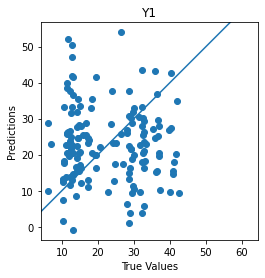

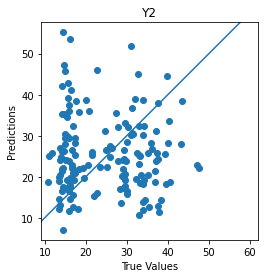

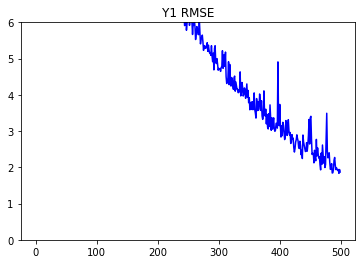

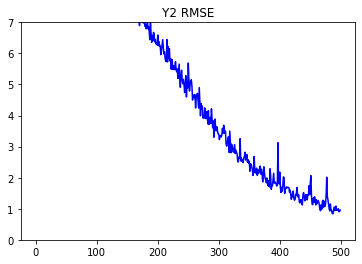

In [14]:
# Plot the loss and mse
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y[0], Y_pred[0], title='Y1')
plot_diff(test_Y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)